***The Findings Below are mine and mine alone and in no way reflect the official views of anyone else.  If you care about this topic, consult a real expert, not someone doing something for a MOOC. Nothing below may be used or cited by anyone else without the express permission of the author***

HUMAN TRAFFICKING: Enforcement Gap in Statistics?
======


Well-meaning people can differ on whether or not an individual should be allowed to sell sex for money, but moral opprobrium towards trafficking persons against their will to participate in the sex trade is near-universal.  Human Trafficking is a complex problem and no casual study like this this can unequivocally.   Between 100,000 and 300,000 persons are vulnerable to human trafficking according to [educational materials](https://www.dhs.gov/sites/default/files/publications/blue-campaign/Blue%20Campaign%20-%20Human%20Trafficking%20101%20for%20School%20Administrators%20and%20Staff.pdf) prepared by the US Department of Homeland Security.  Seattle and San Francisco, as major US population centers almost certainly have victims in human trafficking in their jurisdiction.  Police statics from 2014 provide some evidence that the cities' enforcement strategies towards sex crimes hew to traditional anti-vice approaches rather than decriminalization approaches taken in Jurisdictions elsewhere.

In [122]:
####Import the data for setting up the experiment.  All data is available at this Git Repo held under the same license under which it was provided to the author
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
##import data
seattle = pd.read_csv('seattle_incidents_summer_2014.csv', parse_dates =[7,8,9])
sf = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', parse_dates =[4])


###Prostitution Crimes Represent a  Low Volume Business
Some of the worst crimes present in these data are--thankfully--low volume.  Homicides, aggravated assaults, and kidnappings represent only a small portion of the overall amount of Police business.  However, given the supposed ubiquity of Human Trafficking and its impact on its victims, one might expect a fair amount of police time spent on the issue.  When stacking up the reports between cities, it is clear that police have many demands on their attention.  The segment of reporting in this data human trafficking falls under....generally Prostitution...is more common than more grievous offenses, but far less common than property crime or less grievous offenses.

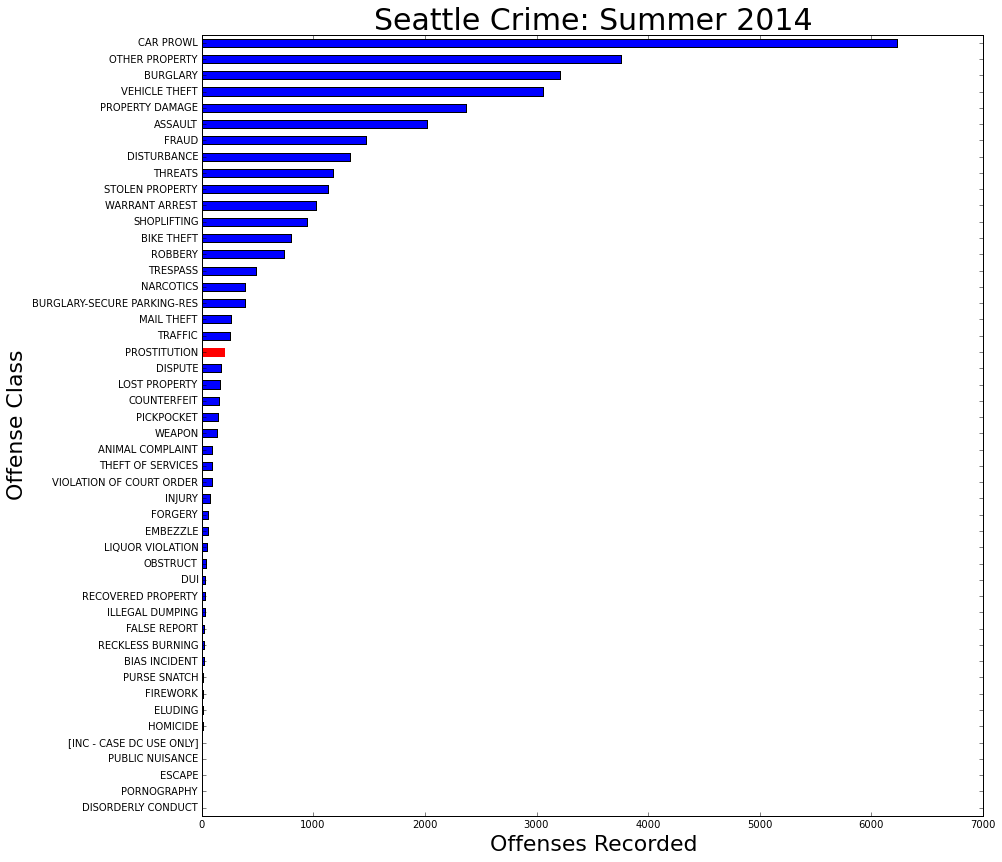

In [159]:
ax1 = seattle['Summarized Offense Description'].value_counts().plot(kind = 'barh',figsize=(14,14))
ax1.set_title('Seattle Crime: Summer 2014', fontsize=30)
ax1.set_ylabel('Offense Class', fontsize =22)
ax1.set_xlabel("Offenses Recorded", fontsize =22)
ax1.get_children()[21].set_color('r')
ax1.invert_yaxis()

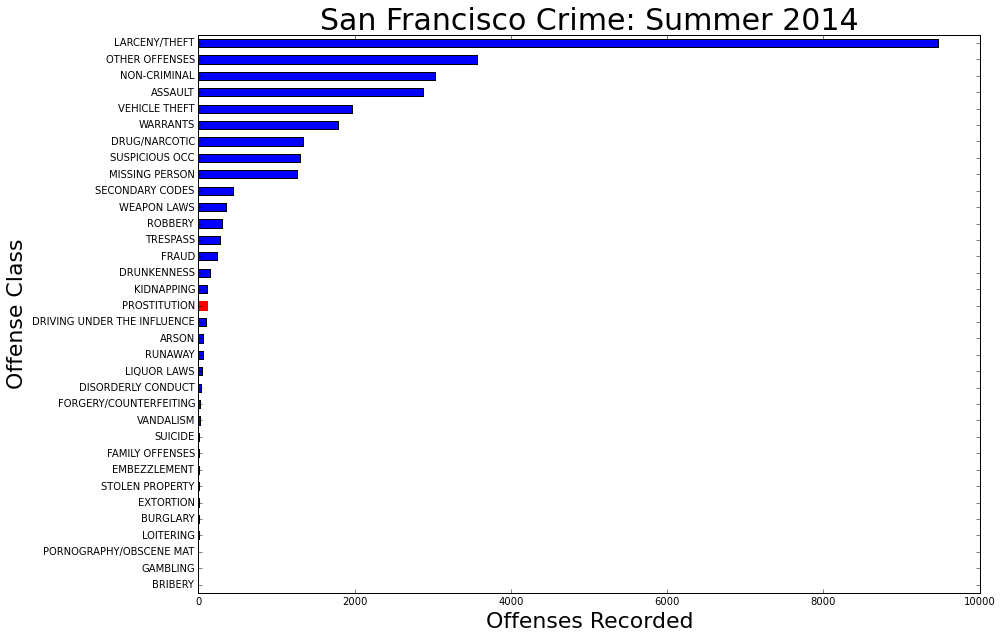

In [155]:
ax2 = sf['Category'].value_counts().plot(kind = 'barh',figsize=(14,10))
ax2.set_title('San Francisco Crime: Summer 2014', fontsize=30)
ax2.set_ylabel('Offense Class', fontsize =22)
ax2.set_xlabel("Offenses Recorded", fontsize =22)
ax2.get_children()[18].set_color('r')
ax2.invert_yaxis()

###Clarity from Concatenation
In order to get a better idea of what occurs on the street, a more detailed dive into th data is in order. For that, however, one must do go deeper into the reports structure.  With tens of thousands of cases, reading and hand coding is both onerous and suceptible to human biases.  For a first attempt at analysis such as this, one can use the searching/regular expressions functions present in many coding languages to bring together larger text reports in order to count events of interest with greater precision.

In [167]:
"""
Create Lists and functions to characterize Crimes
"""
theft = ['THEFT', 'STOLEN', 'FRAUD', 'COUNTERFEIT', 'PICPOCKET', 'BURGLARY', \
'SNATCH', 'EMBEZZLE', 'PROPERTY', 'BURGLARY']
 
weapons = ['WEAPON', 'FIREARM', 'GUN', 'KNIFE']

threatBehavior =['PROWL','THREATS', 'DSPUTE',  'CONDUCT', 'TRESPASS', \
'BEHAVIOR', "SUSPICIOUS"]

traffic = ['TRAFFIC'] 
#Any overlap in the regex is caught by searching prostituion in respective columns...One must search for traffic given the
#amount of time US police officers spend enforcing vehicular code

sexual = ['PROSTITUTION', 'PORNOGRAPHY', 'INDECENT', 'SEXUAL', 'RAPE']

transactions = ['WARRANT',"WARRANTS", 'ORDER', 'REPORT', 'BIAS', 'FIREWORK', \
'OBSTRUCT', 'NUISANCE', 'CONDUCT', 'CODE', 'PAROLE', "NON-CRIMINAL"]

OFelonies =['DUI', 'HOMICIDE', 'IMPRISONMENT', 'SERIOUS',\
 'ASSAULT', 'ABUSE']
 
def to_type(x):
    if x == 1:
        return 'theft'
    elif x ==2:
        return 'weapons'
    elif x == 3:
        return 'threatening behavior'
    elif x == 4:
        return 'traffic infractions'
    elif x ==5:
        return 'sexual'
    elif x ==6:
        return 'police business [serving paper etc...]'
    elif x == 7:
        return 'major felonies'
    else:
        return "other"

In [169]:
seattle['theft']=seattle['Summarized Offense Description'].str.contains("|".join(theft))*1
seattle['weapons']=seattle['Summarized Offense Description'].str.contains("|".join(weapons))*2
seattle['threatBehavior']=seattle['Summarized Offense Description'].str.contains("|".join(threatBehavior))*3
seattle['traffic']=seattle['Summarized Offense Description'].str.contains("|".join(traffic))*4
seattle['sexual']=seattle['Summarized Offense Description'].str.contains("|".join(sexual))*5
seattle['transactions']=seattle['Summarized Offense Description'].str.contains("|".join(transactions))*6
seattle['MajorFelonies']=seattle['Summarized Offense Description'].str.contains("|".join(OFelonies))*7
seattle['sumofallfears'] = seattle['theft']+seattle['weapons']+seattle['threatBehavior']+seattle['traffic']+seattle['sexual']+seattle['transactions']+seattle['MajorFelonies']
seattle['Other'] = seattle.sumofallfears.apply(lambda x: 8 if x == 0 else  0)
seattle['BroadCrimeCat'] =seattle['sumofallfears'] = seattle['theft']+seattle['weapons']+seattle['threatBehavior']+seattle['traffic']+seattle['sexual']+seattle['transactions']+seattle['MajorFelonies']+seattle['Other']
seattle['BroadCrimeCat'] = seattle.BroadCrimeCat.apply(lambda x: to_type(x))

sf['theft'] = sf.Category.str.contains("|".join(theft))*1
sf['weapons'] = sf.Category.str.contains("|".join(weapons))*2
sf['threatBehavior'] = sf.Category.str.contains("|".join(threatBehavior))*3
sf['traffic'] = sf.Category.str.contains("|".join(traffic))*4
sf['sexual'] = sf.Category.str.contains("|".join(sexual))*5
sf['transactions'] = sf.Category.str.contains("|".join(transactions))*6
sf['MajorFelonies'] = sf.Category.str.contains("|".join(OFelonies))*7

sf['sumofallfears'] = sf['theft']+sf['weapons']+sf['threatBehavior']+sf['traffic']+sf['sexual']+sf['transactions']+sf['MajorFelonies']
sf['Other'] =sf.sumofallfears.apply(lambda x: 8 if x == 0 else  0)
sf['BroadCrimeCat'] = sf['theft']+sf['weapons']+sf['threatBehavior']+sf['traffic']+sf['sexual']+sf['transactions']+sf['MajorFelonies']+sf['Other']
sf['BroadCrimeCat'] =sf['BroadCrimeCat'].apply(lambda x: to_type(x))
 

###Day of the Week Matters
If the cities have large efforts to go after human traffickers, one might expect a steady stream of incident and arrest reports as officers do their jobs over a course of a work week. If arrests surge on given days or at given times, it could suggest that enforcement proceeds on an ad-hoc basis or as opportunities arise.

In [170]:
"""
Crimes by day of week
"""
def day_map(daynumber):
    if daynumber == 0:
        return "Mon"
    elif daynumber == 1:
        return "Tues"
    elif daynumber == 2:
        return "Wed"
    elif daynumber == 3:
        return "Thurs"
    elif daynumber == 4:
        return "Fri"
    elif daynumber == 5:
        return "Sat"
    elif daynumber == 6:
        return "Sun"
seattle['DayOfWeek'] = seattle['Occurred Date or Date Range Start'].dt.dayofweek
seattle['DayOfWeek'] = seattle.DayOfWeek.apply(lambda x: day_map(x))


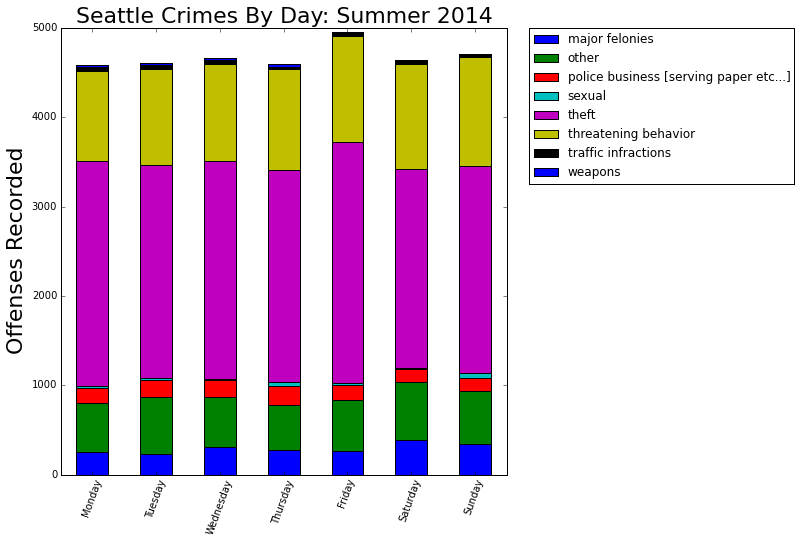

In [173]:
fig = plt.figure(figsize=(10,10))
ax4 = seattle.groupby(seattle['Occurred Date or Date Range Start'].dt.dayofweek)\
['BroadCrimeCat'].value_counts().unstack(1).plot(kind='bar', stacked=True, figsize=(8,8))
ax4.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', "Friday", "Saturday", "Sunday"])
ax4.set_ylabel("Offenses Recorded", fontsize =22)
plt.xticks(rotation = 70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Seattle Crimes By Day: Summer 2014', fontsize =22)

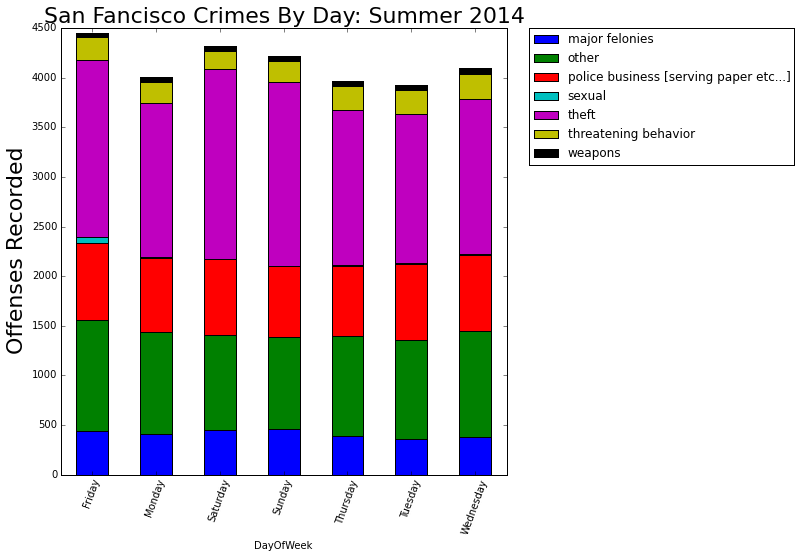

In [175]:
fig = plt.figure(figsize=(10,10))
ax5 = sf.groupby(sf['DayOfWeek'])['BroadCrimeCat'].value_counts().unstack(1).plot(kind='bar', stacked=True, figsize=(8,8))
ax5.set_ylabel("Offenses Recorded", fontsize =22)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 70)
plt.title('San Fancisco Crimes By Day: Summer 2014', fontsize = 22)

###Uneven Sex Crime Interactions During the Week
The data show uneven sex crime interactions with police over the course of the weeks of summer 2014 lending some credence to the concerns of happhazard or opportunistic enforcement.  The sheer volume of other offenses relative to sex-related crime, however, make it difficult to say anything with any degree of statistical rigor or certainty.  To shed some more light on the subject, We'll dive into the more detailed descriptions of what the interactions entailed.

In [187]:
##Create Seattle Focus
seattlefocus = seattle[seattle.sexual==5]
allse = seattle.shape[0]
secb = seattlefocus.shape[0]
print "%s of the %s  (%s) cases fall into the sexual crimes bin in Seattle."%(secb, all, str((float(secb)/float(allse))))
##Create SF Focus
sffocus = sf[sf.sexual ==5]
all = sf.shape[0]
scb = sffocus.shape[0]
print "%s of the %s  (%s) cases fall into the sexual crimes bin in San Francisco" %(scb, all, str(float(scb)/float(all)))

205 of the 28993  (0.00625400408798) cases fall into the sexual crimes bin in Seattle.
113 of the 28993  (0.00389749249819) cases fall into the sexual crimes bin in San Francisco


###Super Small Subset of Police Work
Representing ~6% and ~4% of Police Event Data in Seattle and San Francisco respectively, robust attention to human trafficking does not appear in either of these event data records.

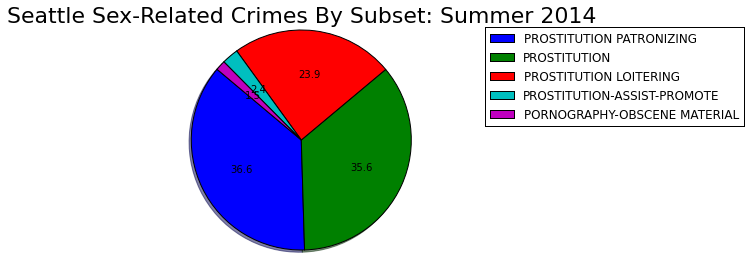

In [192]:
Seproportion = seattlefocus['Offense Type'].value_counts()
Sevalues = Seproportion.values
Selabels = Seproportion.keys()
#Seexplode = (0, 0, 0.4, 0, 0,0,0,0,0)  # explode 3rd slice
# Plot
ax8 = plt.pie(Sevalues, shadow=True, startangle=140, autopct='%.1f')#, explode = Seexplode)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels = Selabels)
plt.axis('equal')
plt.title('Seattle Sex-Related Crimes By Subset: Summer 2014', fontsize = 22)

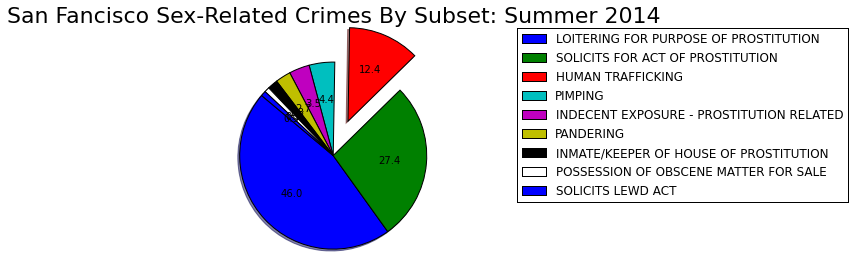

In [190]:
proportion = sffocus.Descript.value_counts()
values = proportion.values
labels = proportion.keys()
explode = (0, 0, 0.4, 0, 0,0,0,0,0)  # explode 3rd slice
# Plot
ax7 = plt.pie(values, shadow=True, startangle=140, autopct='%.1f', explode = explode)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels = labels)
plt.axis('equal')
plt.title('San Fancisco Sex-Related Crimes By Subset: Summer 2014', fontsize = 22)

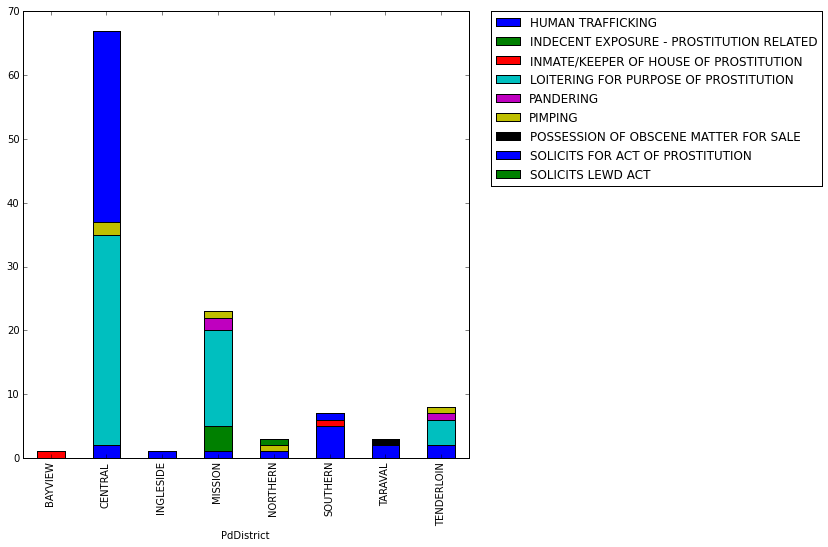

In [93]:
fig = plt.figure(figsize=(10,10))
ax = focus.groupby(sf['PdDistrict'])['Descript'].value_counts().unstack(1).plot(kind='bar', stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [113]:
focus2 = seattle[seattle.sexual ==5]
all = seattle.shape[0]
seabb = focus.shape[0]
print "%s of the %s cases fall into the sexual crimes bin"%(scb, all)

113 of the 32779 cases fall into the sexual crimes bin
